In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('charlottsville_cleaned.csv')

C:\Users\oluba\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (8,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.head()

,user,num_statuses,no_of_favs,num_friends,self_reported_location,num_followers,time_date,full_text,in_reply_to_screen_name,retweet_count,quoted_status_permalink,user_lang
0,Ch3rv6,36,10,14,;),0,2017-08-14 10:28:09+00:00,@Junkbot_K The justification of political viol...,HardRotCafe,0,NaN,en
1,sara31773,290,101,93,"ÜT: 40.619204,-80.054637",0,2017-08-14 03:57:51+00:00,@realDonaldTrump In your name she is dead. Yo...,realDonaldTrump,0,"{'display': 'twitter.com/cnn/status/896…', 'ex...",en
2,dgell99,22,10,52,"Brooklyn, NY",0,2017-08-14 16:24:42+00:00,"@realDonaldTrump Honestly, could you stoop any...",realDonaldTrump,0,NaN,en
3,45Straight,3624,2026,4,Lists & Followers = Block,0,2017-08-14 11:21:04+00:00,@foxandfriends @ScottWRasmussen @DineshDSouza ...,foxandfriends,0,NaN,en
4,CmikkiC123,20185,12331,1,"ORLANDO, FL USA",0,2017-08-14 10:55:37+00:00,"Will There Be An ""Executive Order/Travel Ban"" ...",NaN,0,NaN,en


#### EDA

In [5]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228317 entries, 0 to 228316
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   user                     228317 non-null  object
 1   num_statuses             228317 non-null  int64 
 2   no_of_favs               228317 non-null  int64 
 3   num_friends              228317 non-null  int64 
 4   self_reported_location   166580 non-null  object
 5   num_followers            228317 non-null  int64 
 6   time_date                228317 non-null  object
 7   full_text                228317 non-null  object
 8   in_reply_to_screen_name  5805 non-null    object
 9   retweet_count            228317 non-null  int64 
 10  quoted_status_permalink  17993 non-null   object
 11  user_lang                227946 non-null  object
dtypes: int64(5), object(7)
memory usage: 20.9+ MB


,num_statuses,no_of_favs,num_friends,num_followers,retweet_count
count,2.283170e+05,2.283170e+05,228317.000000,2.283170e+05,228317.000000
mean,6.188206e+04,5.168811e+04,2432.667502,6.588377e+03,11677.025232
std,1.082517e+05,8.770380e+04,6420.233816,1.518730e+05,25649.498991
min,1.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,6.661000e+03,4.521000e+03,358.000000,2.150000e+02,58.000000
50%,2.413600e+04,1.911400e+04,911.000000,6.890000e+02,1341.000000
75%,7.133800e+04,6.019600e+04,2562.000000,2.297000e+03,8414.000000
max,4.022198e+06,2.306973e+06,848096.000000,2.634499e+07,134017.000000


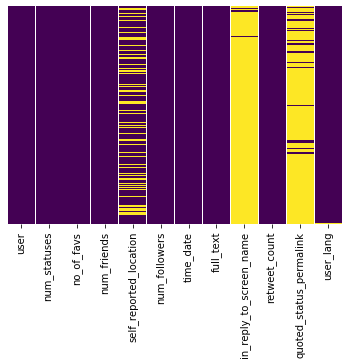

In [6]:
# Visualize missing values

sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)

In [7]:
data.columns

Index(['user', 'num_statuses', 'no_of_favs', 'num_friends',
       'self_reported_location', 'num_followers', 'time_date', 'full_text',
       'in_reply_to_screen_name', 'retweet_count', 'quoted_status_permalink',
       'user_lang'],
      dtype='object')

In [8]:
# Drop some columns

data2 = data.drop(['self_reported_location', 'in_reply_to_screen_name',
                   'quoted_status_permalink'], axis =1)

In [9]:
# Add new features from datetime stamp.
# We focus only on the hour of the day, since all tweets are from the same date.month.year

def extract_hour(x):
    hour = pd.DatetimeIndex(x).hour
    return hour

In [10]:
# Add new feature to dataframe

data2['hours'] = extract_hour(data2['time_date'])

In [11]:
data2.head(2)

,user,num_statuses,no_of_favs,num_friends,num_followers,time_date,full_text,retweet_count,user_lang,hours
0,Ch3rv6,36,10,14,0,2017-08-14 10:28:09+00:00,@Junkbot_K The justification of political viol...,0,en,10
1,sara31773,290,101,93,0,2017-08-14 03:57:51+00:00,@realDonaldTrump In your name she is dead. Yo...,0,en,3


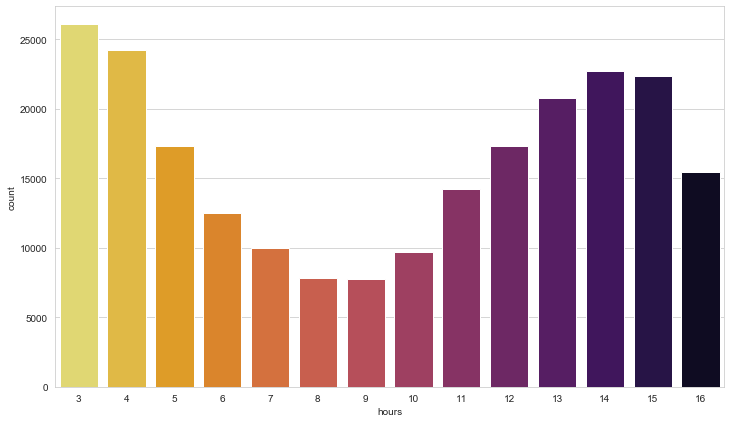

In [56]:

sns.set_style(style='whitegrid')
plt.figure(figsize=(12, 7))
sns.countplot(data2['hours'], palette='inferno_r')
plt.savefig("Tweets_by_hour.png")

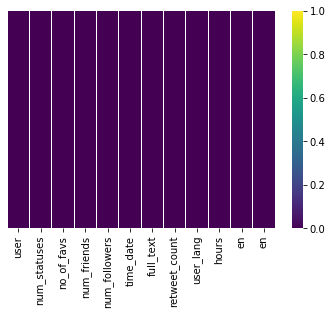

In [32]:
sns.heatmap(data2.isnull(), cmap='viridis', yticklabels=False)

In [37]:
# sns.countplot(data2.user_lang)
# There are some missing values in the 'user_lang' column
# I tried to check what language the tweets were written in, if english, then I fill then up as 'en'

data2[data2['user_lang'] != 'en']

,user,num_statuses,no_of_favs,num_friends,num_followers,time_date,full_text,retweet_count,user_lang,hours
227946,oldgee11,830,919,112,15,2017-08-14 14:08:37+00:00,I don't know her name but I got a new crush. 😍,0,NaN,14
227947,TheBlindSage1,8922,33,624,34,2017-08-14 16:26:09+00:00,RT @20committee: EXCLUSIVE:,0,NaN,16
227948,jcalla05,9558,3364,740,40,2017-08-14 16:22:06+00:00,RT @20committee: EXCLUSIVE:,0,NaN,16
227949,drizzzyDeLa,5311,19020,222,40,2017-08-14 15:31:02+00:00,RT @20committee: EXCLUSIVE:,0,NaN,15
227950,ephirZ,7527,9350,50,47,2017-08-14 15:35:42+00:00,RT @20committee: EXCLUSIVE:,0,NaN,15
...,...,...,...,...,...,...,...,...,...,...
228312,MelissaJPeltier,434045,621350,9689,47809,2017-08-14 04:43:36+00:00,RT @20committee: Guy was just shot &amp; nearl...,0,NaN,4
228313,MelissaJPeltier,433974,621126,9689,47817,2017-08-14 15:28:25+00:00,RT @20committee: EXCLUSIVE:,0,NaN,15
228314,DrDenaGrayson,61870,154928,328,196289,2017-08-14 15:51:31+00:00,RT @20committee: EXCLUSIVE:,0,NaN,15
228315,GreatDismal,172901,2350,258,259033,2017-08-14 15:49:51+00:00,RT @20committee: EXCLUSIVE:,0,NaN,15


In [42]:
data2['user_lang'].fillna(value='en', inplace=True)

In [43]:
data2['user_lang']

0         en
1         en
2         en
3         en
4         en
          ..
228312    en
228313    en
228314    en
228315    en
228316    en
Name: user_lang, Length: 228317, dtype: object

In [57]:
# Drop non-numerical features


df = data2.drop(['user','full_text','time_date', 'user_lang'], axis=1)
df.head(2)

,num_statuses,no_of_favs,num_friends,num_followers,retweet_count,hours
0,36,10,14,0,0,10
1,290,101,93,0,0,3


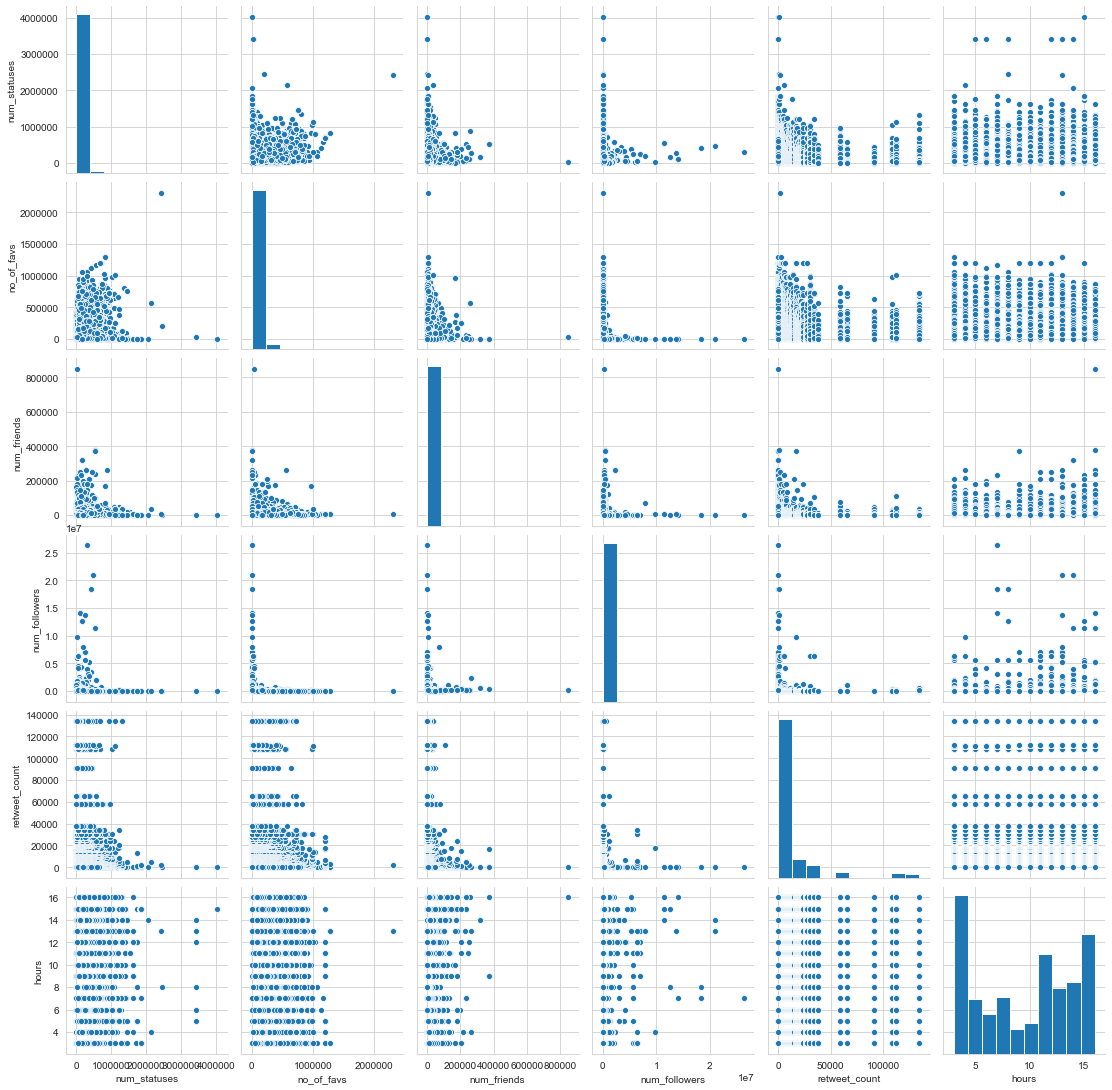

In [58]:
sns.pairplot(df)
# Which pair of features correlate

###### The discrete numbers making up the values of thecolumns makes the plot above less useful

In [113]:
df.corr()

,num_statuses,no_of_favs,num_friends,num_followers,retweet_count,hours,en
num_statuses,1.000000,0.550782,0.265425,0.051524,-0.110152,-0.005260,-0.016771
no_of_favs,0.550782,1.000000,0.206400,-0.001438,-0.090232,-0.025868,-0.024861
num_friends,0.265425,0.206400,1.000000,0.059152,-0.080805,0.009483,-0.001927
num_followers,0.051524,-0.001438,0.059152,1.000000,-0.013991,0.008045,0.000402
retweet_count,-0.110152,-0.090232,-0.080805,-0.013991,1.000000,-0.069239,0.018366
hours,-0.005260,-0.025868,0.009483,0.008045,-0.069239,1.000000,-0.039577
en,-0.016771,-0.024861,-0.001927,0.000402,0.018366,-0.039577,1.000000


### PCA
I dont know if PCA is neccessary in this case since we do no have many features, but I still go ahead to do it, just incase

In [59]:
# Preprocessing

from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [62]:
scale_df = scaler.transform(df)

In [64]:
# scale_df

In [69]:
# PCA  #

In [65]:
from sklearn.decomposition import PCA

In [67]:
pca = PCA(n_components=2)

In [68]:
pca.fit(scale_df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [70]:
# transform this data into its principal components

i_pca = pca.transform(scale_df)

In [102]:
# check shape

# scale_df.shape
i_pca.shape

(228317, 2)

In [117]:
# type(i_pca)
i_pca

(228317, 2)

Text(0, 0.5, 'Principal Component B')

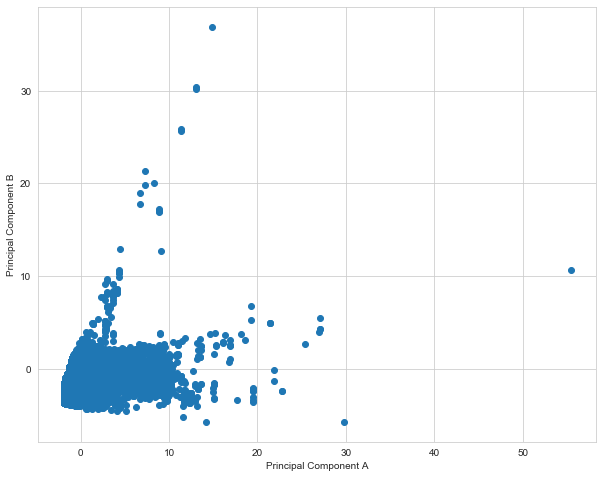

In [78]:
# Visualize the correlation

plt.figure(figsize=(10,8))
plt.scatter(i_pca[:,0], i_pca[:,1])
plt.xlabel("Principal Component A")
plt.ylabel("Principal Component B")


###### To be honest, I don't know how to interpret the above. But I guess it simply means clustering (as against classification) will be the better method

###### Corresponding the PrincComps with original features

In [79]:
pca.components_

array([[ 6.33379068e-01,  6.07707410e-01,  4.21433235e-01,
         7.97145172e-02, -2.13452679e-01,  4.88195258e-04],
       [-1.00941917e-01, -1.70301601e-01,  6.69320486e-02,
         2.14730323e-01, -5.70290967e-01,  7.64844622e-01]])

In [80]:
df2 = pd.DataFrame(pca.components_, columns=df.columns)

In [81]:
df2

,num_statuses,no_of_favs,num_friends,num_followers,retweet_count,hours
0,0.633379,0.607707,0.421433,0.079715,-0.213453,0.000488
1,-0.100942,-0.170302,0.066932,0.214730,-0.570291,0.764845


##### The strength of the correlations can be better seen with heatmap plotting

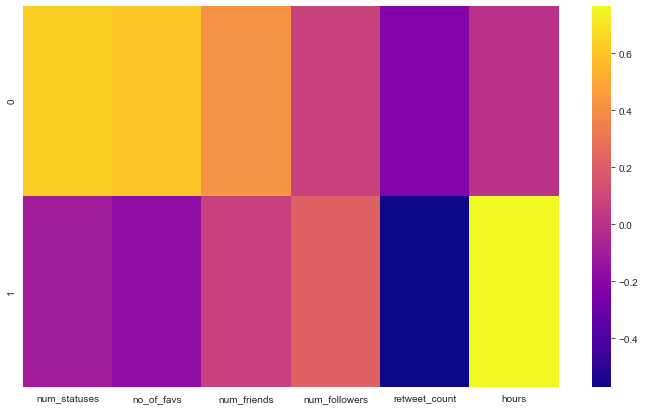

In [98]:
plt.figure(figsize=(12, 7))

sns.heatmap(df2,cmap='plasma')
plt.savefig("PCA Heatmap.png")

###### Hour of the day, number of statuses, num of favourites ONLY???

In [196]:
from sklearn.cluster import KMeans

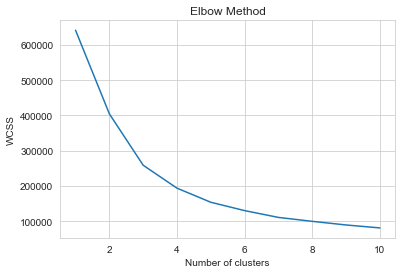

In [197]:
# Using the Elbow method to search for optimal K-Value

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(i_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

###### I determined 4 to be the ideal/optimum value of clusters

In [198]:
# kmeans = KMeans(n_clusters=2)
# kmeans = KMeans(n_clusters=3)
kmeans = KMeans(n_clusters=4)
# kmeans = KMeans(n_clusters=5)
# kmeans = KMeans(n_clusters=6)
# kmeans = KMeans(n_clusters=7)
# kmeans = KMeans(n_clusters=8)

In [199]:
kmeans.fit(i_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [200]:
kmeans.labels_

array([3, 1, 3, ..., 3, 3, 2])

In [201]:
kmeans.cluster_centers_
# centroids

array([[ 5.97933188, -0.69603647],
       [-0.54466422, -0.88503875],
       [ 1.69500939, -0.16083548],
       [-0.35104409,  0.82789042]])

In [202]:
# cent = kmeans.cluster_centers_
# len(cent)

In [203]:
i_pca[:,1]

array([ 0.46581403, -0.7253968 ,  1.48761256, ...,  1.2392988 ,
        1.52002172,  1.21536237])

In [204]:
# plt.scatter(i_pca[:,0], i_pca[:,1],cmap='rainbow')

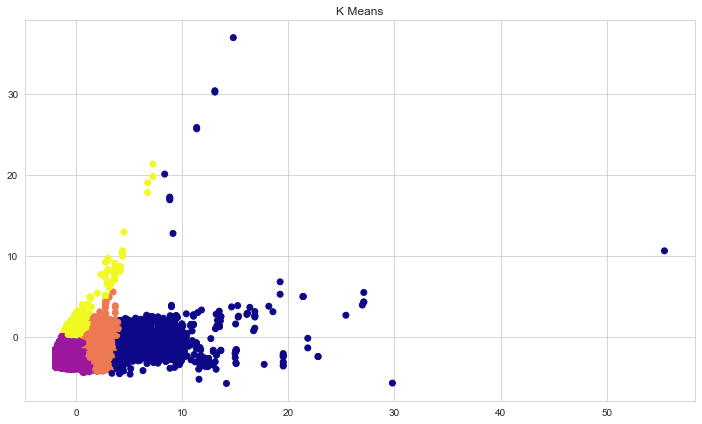

In [205]:
plt.figure(figsize=(12,7))

plt.title('K Means')
plt.scatter(i_pca[:,0], i_pca[:,1], c=kmeans.labels_,cmap='plasma')


#### SO THIS IS WHERE MY PROBLEM BEGINS: 
I tried to use the above trained model on the original PCA-treated dataframe. 
How proper or logically correct that step is I dont know. Pls tell me!

My thinking is that the model can be used to predict the category each user in the original dataset would fall in. Hopefully you can help out here!

In [216]:
y_pred = kmeans.fit_predict(df)

In [374]:
# len(y_pred)
y_pred

array([0, 0, 0, ..., 0, 0, 2])

In [220]:
# creating a new dataframe
final_df = df

In [222]:
# adding the label as a columns to dataframe

final_df['label'] = y_pred

In [226]:
final_df

,num_statuses,no_of_favs,num_friends,num_followers,retweet_count,hours,label
0,36,10,14,0,0,10,0
1,290,101,93,0,0,3,0
2,22,10,52,0,0,16,0
3,3624,2026,4,0,0,11,0
4,20185,12331,1,0,0,10,0
...,...,...,...,...,...,...,...
228312,434045,621350,9689,47809,0,4,2
228313,433974,621126,9689,47817,0,15,2
228314,61870,154928,328,196289,0,15,0
228315,172901,2350,258,259033,0,15,0


In [231]:
final_df['label'].unique()

array([0, 2, 3, 1])

In [243]:
# Add user names from initial data

final_df[['username','tweet']]= data[['user','full_text']]

In [244]:
final_df.head()

,num_statuses,no_of_favs,num_friends,num_followers,retweet_count,hours,label,username,tweet
0,36,10,14,0,0,10,0,Ch3rv6,@Junkbot_K The justification of political viol...
1,290,101,93,0,0,3,0,sara31773,@realDonaldTrump In your name she is dead. Yo...
2,22,10,52,0,0,16,0,dgell99,"@realDonaldTrump Honestly, could you stoop any..."
3,3624,2026,4,0,0,11,0,45Straight,@foxandfriends @ScottWRasmussen @DineshDSouza ...
4,20185,12331,1,0,0,10,0,CmikkiC123,"Will There Be An ""Executive Order/Travel Ban"" ..."


##### Create new Dataframes for each label categories

In [373]:
cat_2 = final_df[final_df['label'] == 2]
# cat_2

In [372]:
cat_0 = final_df[final_df['label'] == 0]
# cat_0

In [371]:
cat_1 =final_df[final_df['label'] == 1]
# cat_1

In [370]:
cat_3 =final_df[final_df['label'] == 3]
# cat_3

In [254]:
# cat_0.columns[7]

'username'

In [365]:
# Create a function to grab the usernames in each label category and their Tweets and write same to a csv file for further 
# qualitative analysis

def user_tweet(x,y,filename=""):
#     count = 0
    file_dict = {}
    user_list = []
    tweet_list= []
    
    for i in x:
        user_list.append(i)
        
    for k in y:
        tweet_list.append(k)
        
    file_dict['users'] = user_list
    file_dict['message'] = tweet_list
    
    
    
    csv_data = pd.DataFrame(file_dict)
    
#     Write dataframe to file
    wrt_file =csv_data.to_csv(filename +'.csv', header=True)
        
    print("File has been written to cwd as '{}.csv'".format(filename))
        
#     return csv_data
        
    

In [366]:
user_tweet(cat_2['username'], cat_2['tweet'],"cat_2")

File has been written to cwd as 'cat_2.csv'


In [367]:
user_tweet(cat_0['username'], cat_0['tweet'],"cat_0")

File has been written to cwd as 'cat_0.csv'


In [368]:
user_tweet(cat_1['username'], cat_1['tweet'],"cat_1")

File has been written to cwd as 'cat_1.csv'


In [369]:
user_tweet(cat_3['username'], cat_3['tweet'],"cat_3")

File has been written to cwd as 'cat_3.csv'
